In [55]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype

In [2]:
df = pd.read_csv(r'C:\Users\Fernando Araiza\Downloads\starbucks_drinkMenu_expanded.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          242 non-null    object 
 1   Beverage                   242 non-null    object 
 2   Beverage_prep              242 non-null    object 
 3   Calories                   242 non-null    int64  
 4    Total Fat (g)             242 non-null    object 
 5   Trans Fat (g)              242 non-null    float64
 6   Saturated Fat (g)          242 non-null    float64
 7    Sodium (mg)               242 non-null    int64  
 8    Total Carbohydrates (g)   242 non-null    int64  
 9   Cholesterol (mg)           242 non-null    int64  
 10   Dietary Fibre (g)         242 non-null    int64  
 11   Sugars (g)                242 non-null    int64  
 12   Protein (g)               242 non-null    float64
 13  Vitamin A (% DV)           242 non-null    object 

In [4]:
df.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [5]:
df.isnull().sum()

Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

In [6]:
df.dropna(axis = 0, inplace = True)

In [7]:
df.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)                object
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
Caffeine (mg)                 object
dtype: object

In [8]:
df[' Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [9]:
df.loc[df[' Total Fat (g)'] == '3 2']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,3 2,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0


In [10]:
df[' Total Fat (g)'] = df[' Total Fat (g)'].replace('3 2', '32') 

In [11]:
# Convert all columns except 1st to float
df[' Total Fat (g)']  = df[' Total Fat (g)'].astype(float)

In [12]:
df['Caffeine (mg)'].unique()

array(['175', '260', '330', '410', '75', '150', '85', '95', '180', '225',
       '300', '10', '20', '25', '30', '0', 'Varies', '50', '70', '120',
       '55', '80', '110', 'varies', '165', '235', '90', '125', '170',
       '15', '130', '140', '100', '145', '65', '105'], dtype=object)

In [13]:
df.loc[df['Caffeine (mg)'] == 'Varies']

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,Varies
167,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Grande,80,0.0,0.0,0.0,0,0,21,0,21,0.0,0%,0%,0%,0%,Varies
168,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Venti,120,0.0,0.0,0.0,0,0,31,0,31,0.0,0%,0%,0%,0%,Varies
169,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Tall,100,0.0,0.0,0.0,0,0,25,0,24,0.1,0%,10%,0%,0%,Varies
170,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Grande,130,0.0,0.0,0.0,0,0,33,0,33,0.1,0%,15%,0%,0%,Varies
171,Shaken Iced Beverages,Shaken Iced Tazo® Tea Lemonade (With Classic S...,Venti,190,0.0,0.0,0.0,0,0,49,0,49,0.1,0%,20%,0%,0%,Varies
172,Smoothies,Banana Chocolate Smoothie,Grande Nonfat Milk,280,2.5,1.5,0.0,5,150,53,7,34,20.0,10%,15%,20%,0%,Varies


In [14]:
# Many items have caffeine as 'varies', Caffeine at this point is not important to me so I will create a new df without 
#the caffeine column, in case I need the column later.

df1 = df.drop(columns = 'Caffeine (mg)')

In [15]:
df1.dtypes

Beverage_category             object
Beverage                      object
Beverage_prep                 object
Calories                       int64
 Total Fat (g)               float64
Trans Fat (g)                float64
Saturated Fat (g)            float64
 Sodium (mg)                   int64
 Total Carbohydrates (g)       int64
Cholesterol (mg)               int64
 Dietary Fibre (g)             int64
 Sugars (g)                    int64
 Protein (g)                 float64
Vitamin A (% DV)              object
Vitamin C (% DV)              object
 Calcium (% DV)               object
Iron (% DV)                   object
dtype: object

In [16]:
# There are 4 columns that have percentage value as string, going to convert those to numbers
percent = ['Vitamin A (% DV) ' , 'Vitamin C (% DV)', ' Calcium (% DV) ', 'Iron (% DV) ']
for column in percent:
    df1[column] = df1[column].astype(str).str.rstrip('%').astype(float)/100

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 241
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          241 non-null    object 
 1   Beverage                   241 non-null    object 
 2   Beverage_prep              241 non-null    object 
 3   Calories                   241 non-null    int64  
 4    Total Fat (g)             241 non-null    float64
 5   Trans Fat (g)              241 non-null    float64
 6   Saturated Fat (g)          241 non-null    float64
 7    Sodium (mg)               241 non-null    int64  
 8    Total Carbohydrates (g)   241 non-null    int64  
 9   Cholesterol (mg)           241 non-null    int64  
 10   Dietary Fibre (g)         241 non-null    int64  
 11   Sugars (g)                241 non-null    int64  
 12   Protein (g)               241 non-null    float64
 13  Vitamin A (% DV)           241 non-null    float64

In [18]:
interested = df1.columns

In [19]:
interested

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) '],
      dtype='object')

In [20]:
high_sugar = df1[df1[' Sugars (g)'] >30]

In [21]:
sugars = high_sugar.sort_values(by = ' Sugars (g)', ascending = False)

In [22]:
sugars

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV)
214,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Venti Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,0.10,0.00,0.20,0.35
215,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,0.06,0.00,0.15,0.35
101,Signature Espresso Drinks,Caramel Apple Spice (Without Whipped Cream),Venti,360,0.0,0.0,0.0,0,25,89,0,83,0.0,0.00,0.00,0.00,0.00
216,Frappuccino® Blended Coffee,Java Chip (Without Whipped Cream),Soymilk,430,8.0,4.5,0.0,0,330,88,3,80,6.0,0.06,0.00,0.20,0.40
206,Frappuccino® Blended Coffee,Caramel (Without Whipped Cream),Whole Milk,370,5.0,3.0,0.1,15,300,78,0,77,5.0,0.08,0.00,0.15,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Signature Espresso Drinks,Caramel Macchiato,Soymilk,250,7.0,1.5,0.0,5,140,36,1,31,11.0,0.15,0.00,0.40,0.20
174,Smoothies,Banana Chocolate Smoothie,Soymilk,290,4.5,1.5,0.0,5,150,51,7,31,19.0,0.06,0.15,0.20,0.20
148,Tazo® Tea Drinks,Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos),Grande Nonfat Milk,150,0.2,0.1,0.0,5,85,31,0,31,7.0,0.15,0.00,0.25,0.00
168,Shaken Iced Beverages,Shaken Iced Tazo® Tea (With Classic Syrup),Venti,120,0.0,0.0,0.0,0,0,31,0,31,0.0,0.00,0.00,0.00,0.00


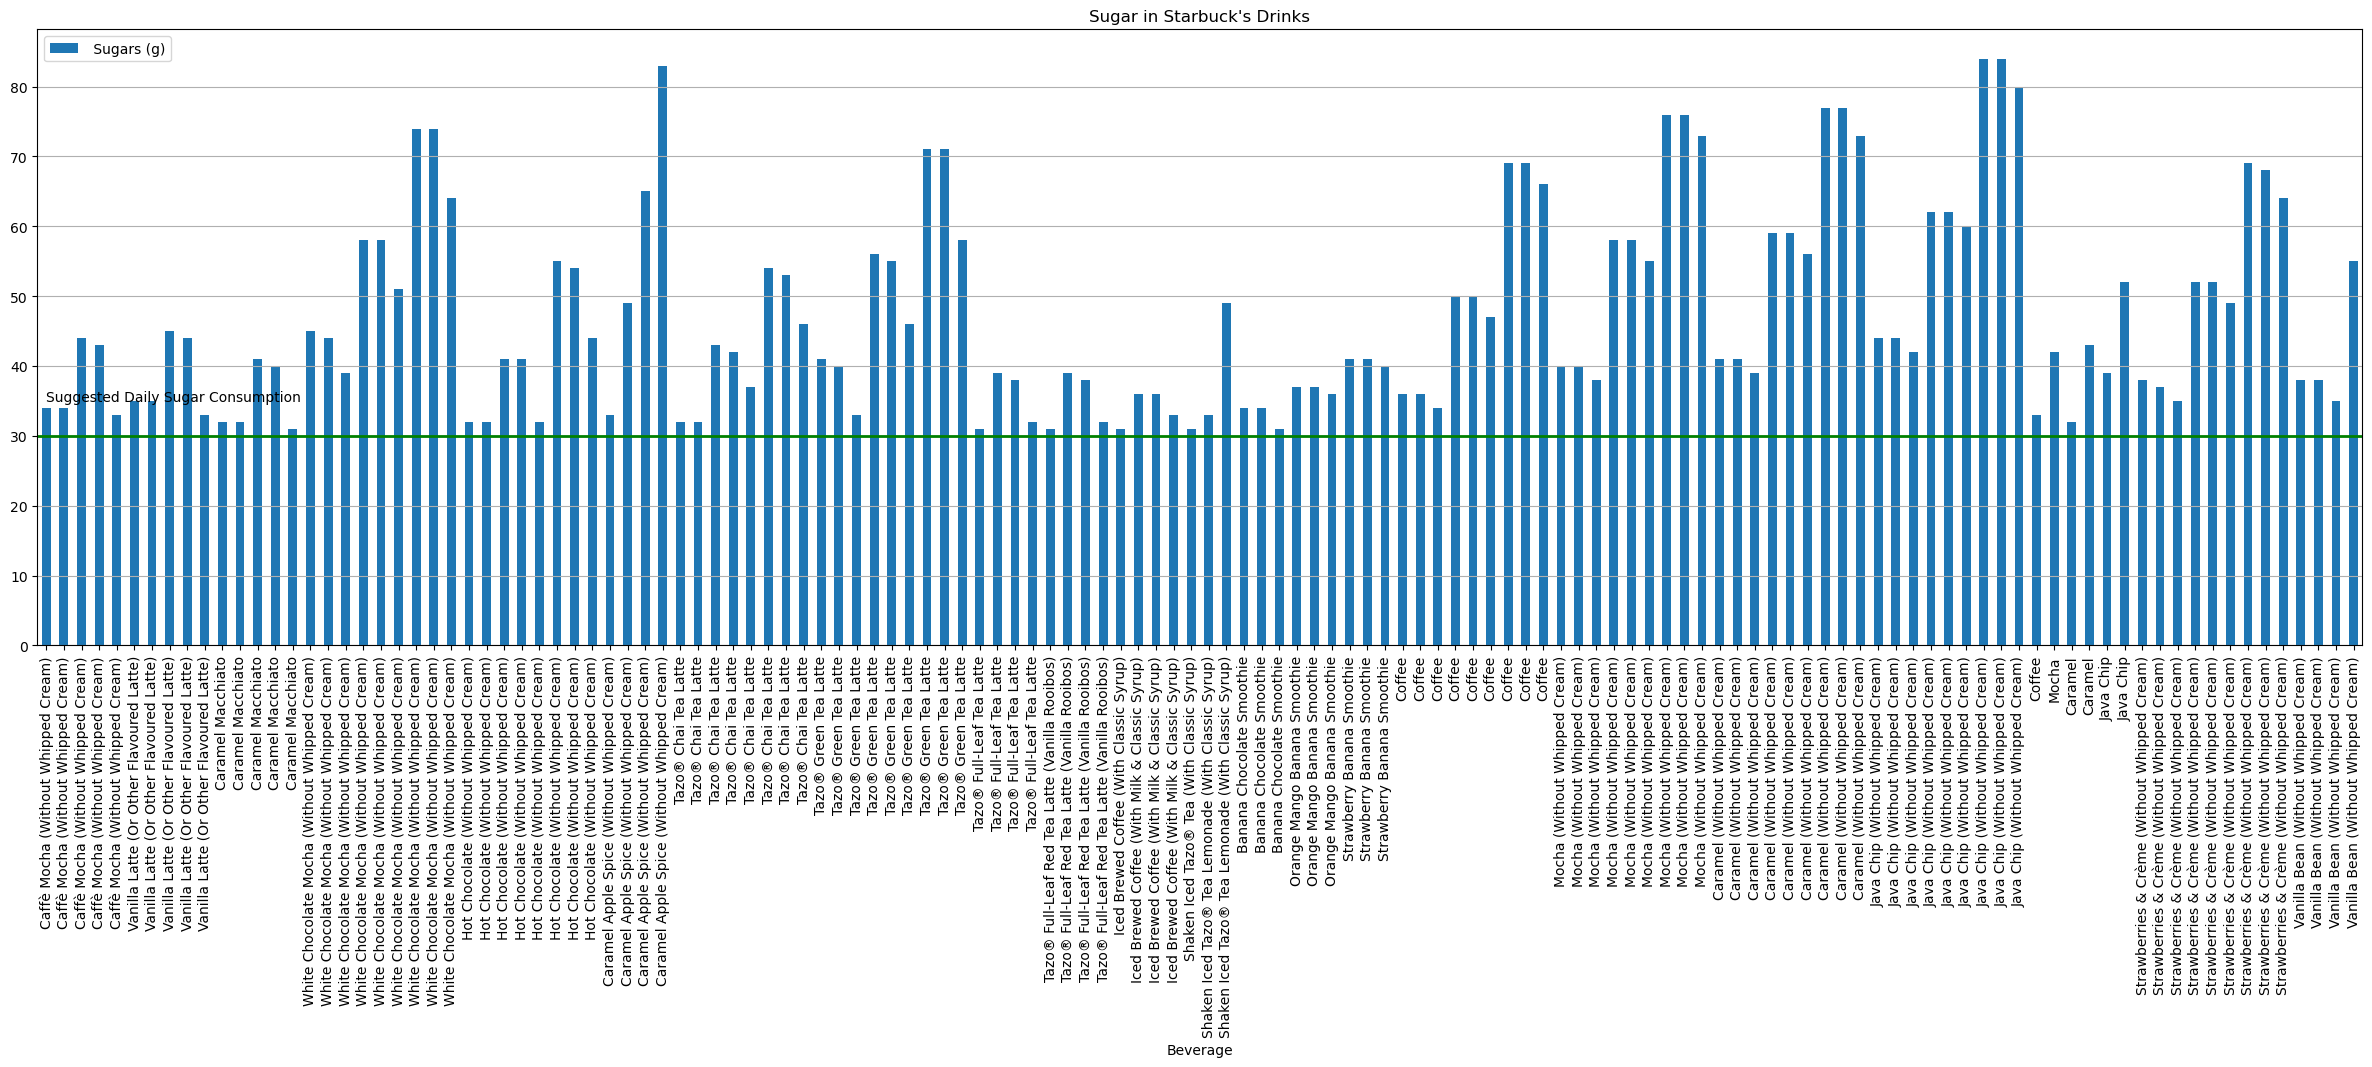

In [23]:
bar_plot = high_sugar.plot(kind='bar', title = "Sugar in Starbuck's Drinks", x = 'Beverage', y = ' Sugars (g)', figsize=(30,8));
bar_plot.legend(loc='upper left');
bar_plot.grid(axis='y');
#draw the line
bar_plot.axhline(y=30, color= 'green', linewidth=2,)
# add text
bar_plot.text(x= 0, y=35, s='Suggested Daily Sugar Consumption');

In [24]:
high_carb = df1[df1[' Total Carbohydrates (g) ']  > 225]


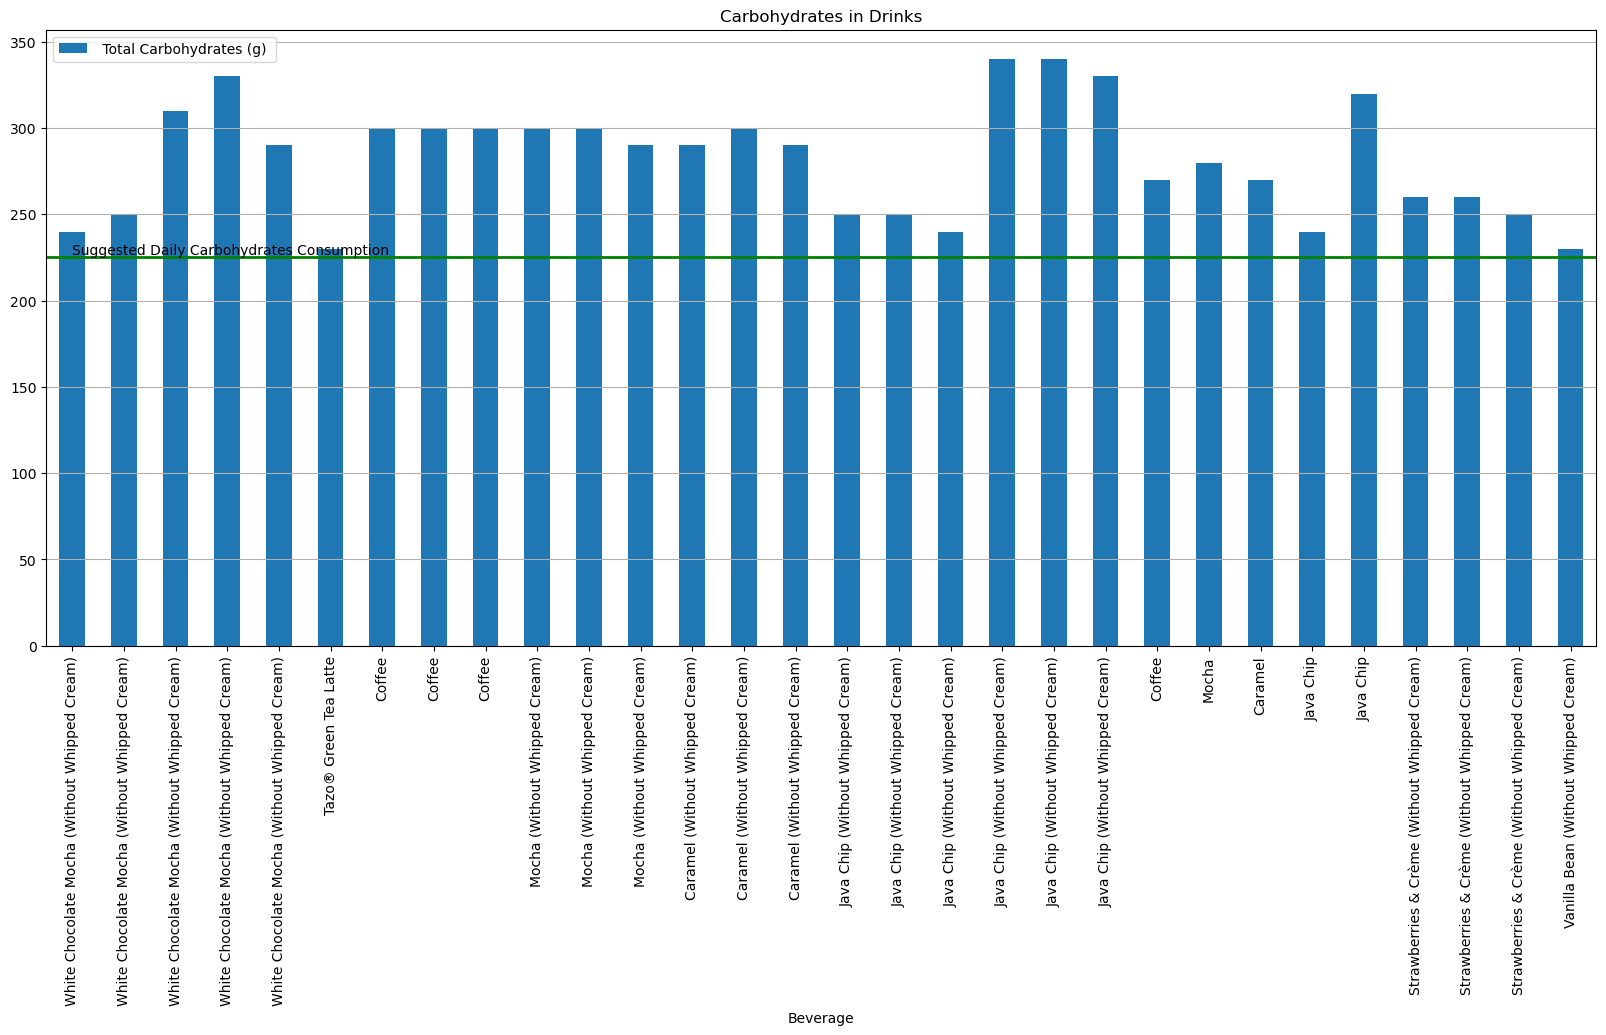

In [25]:

bar_plot = high_carb.plot(kind='bar', title = 'Carbohydrates in Drinks', x = 'Beverage', y = ' Total Carbohydrates (g) ', figsize=(20,8));
bar_plot.legend(loc='upper left');
bar_plot.grid(axis='y');
#draw the line
bar_plot.axhline(y=225, color= 'green', linewidth=2,)
# add text
bar_plot.text(x= 0, y=227, s='Suggested Daily Carbohydrates Consumption');

In [49]:
df1.

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) '],
      dtype='object')

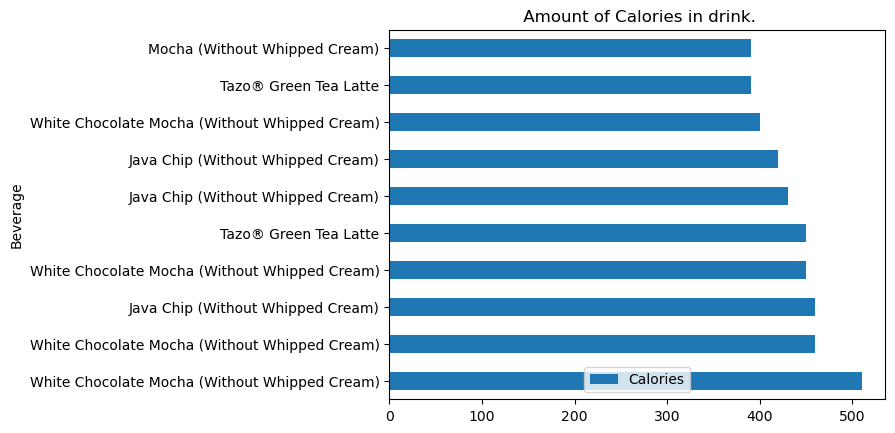

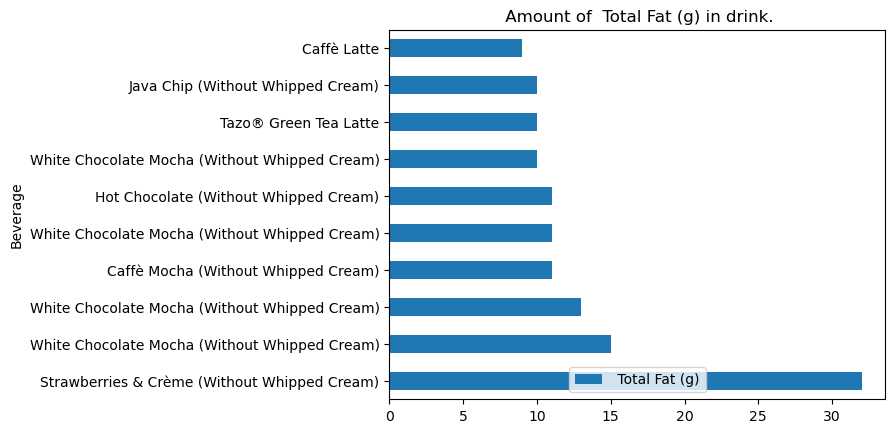

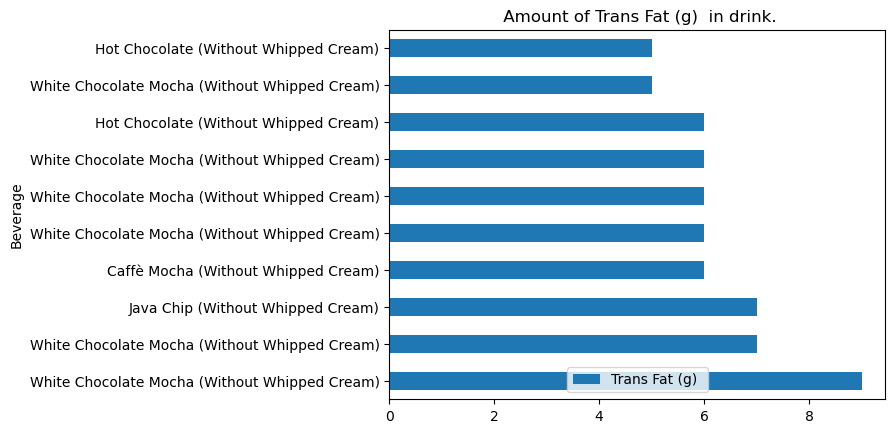

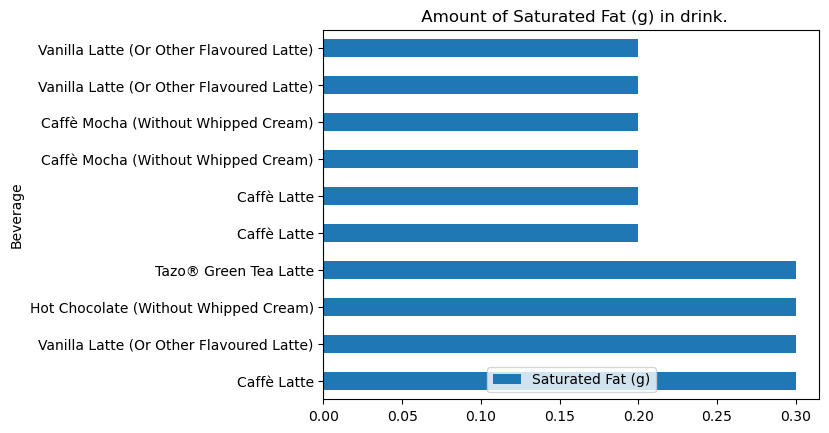

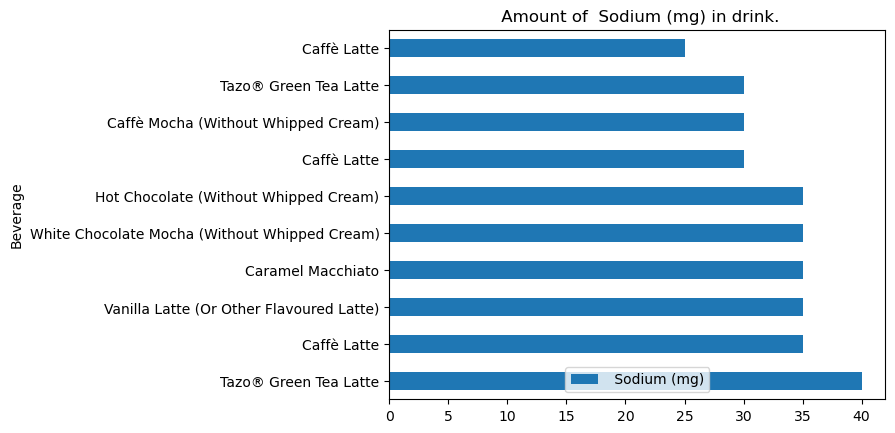

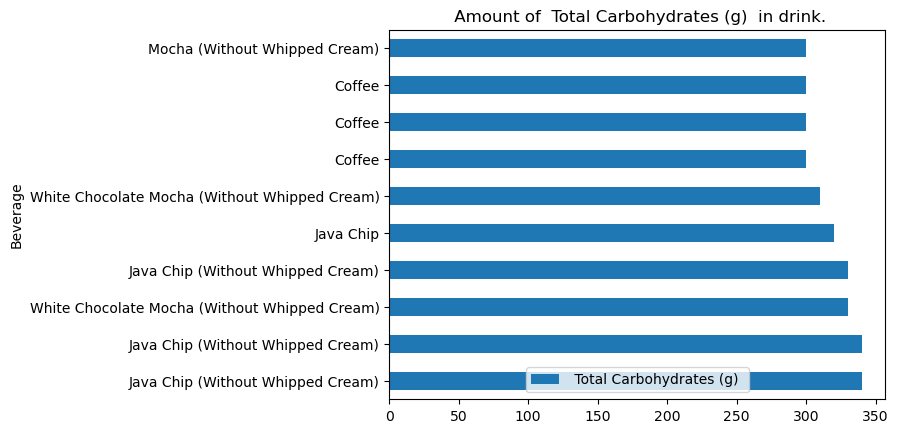

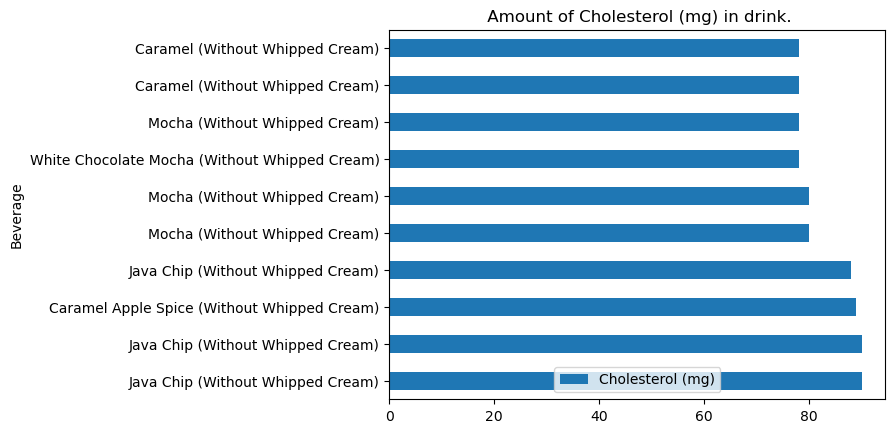

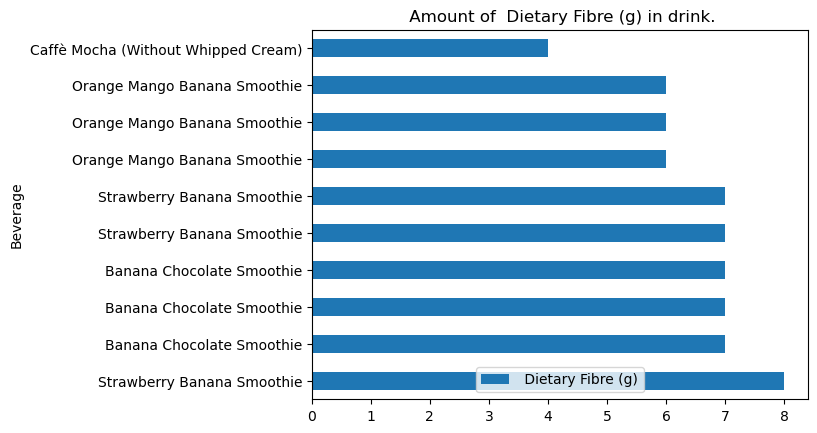

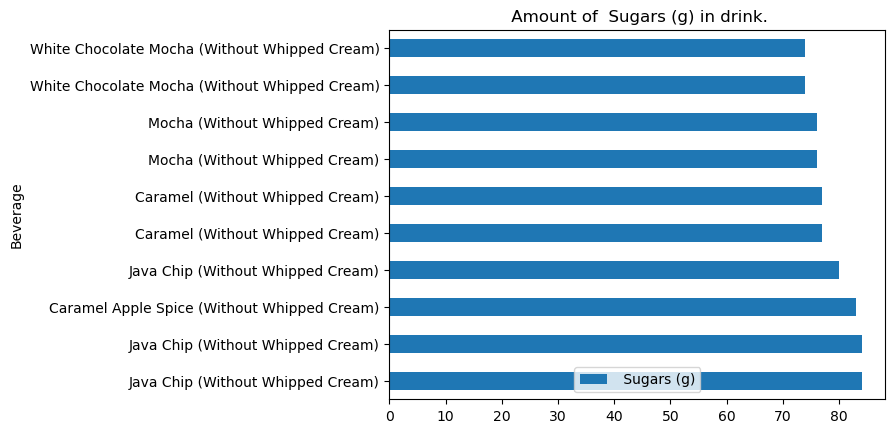

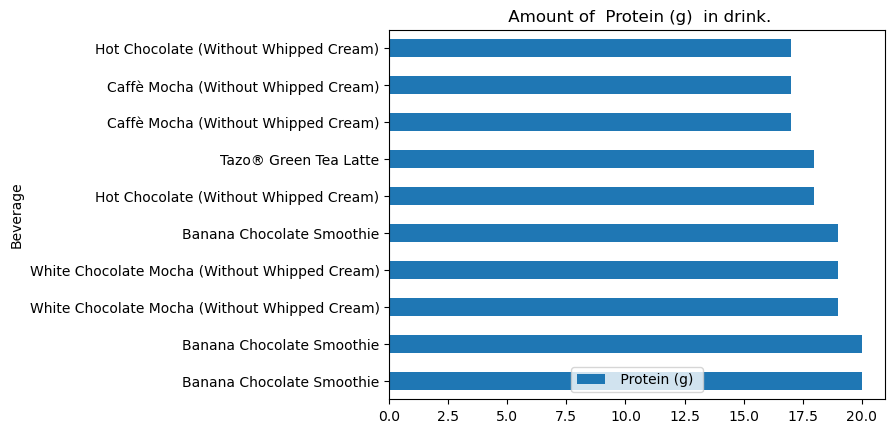

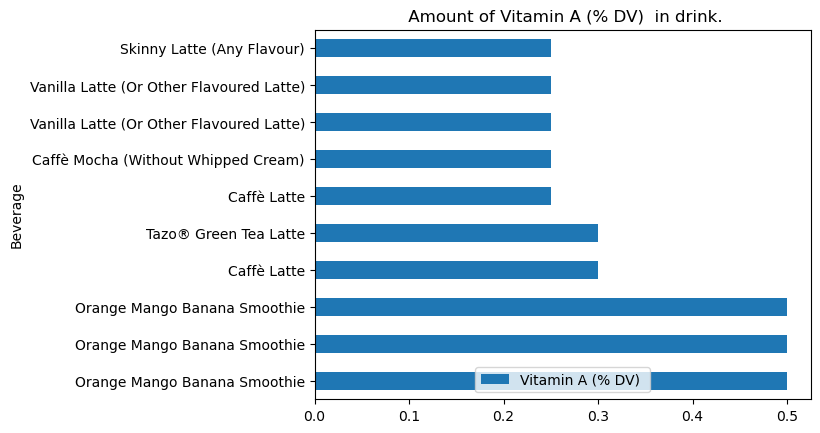

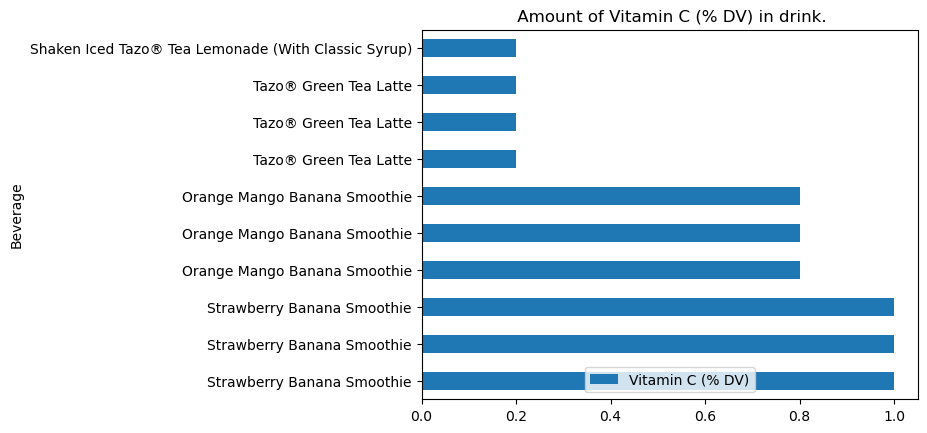

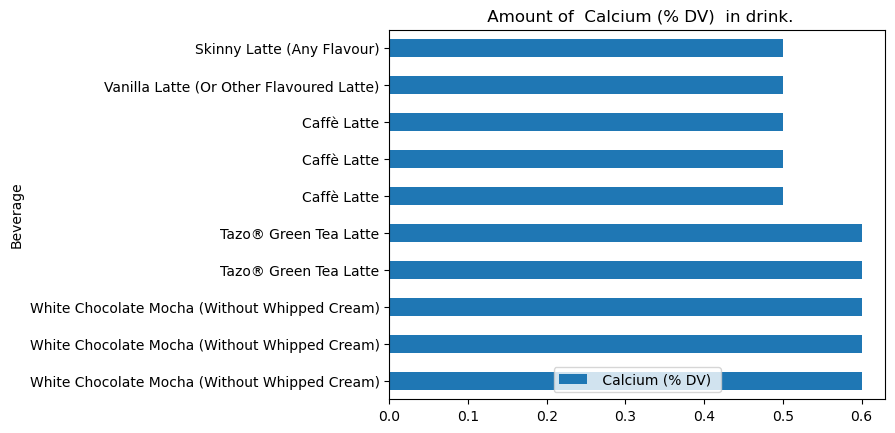

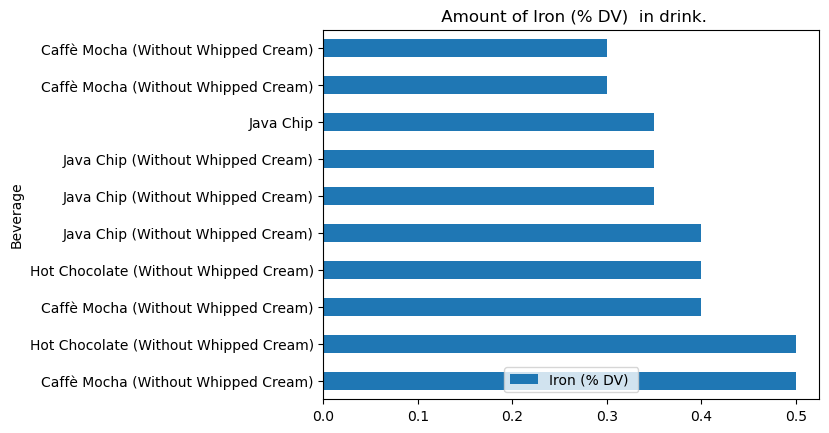

In [62]:
possible = [' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)']

for column in df1:
    if is_numeric_dtype(df1[column]) == True:
        suzy = df1[['Beverage', column]]
        top_10 = suzy.nlargest(10, column)
        t = top_10.plot(kind = 'barh', x = 'Beverage', y = column, title = f' Amount of {column} in drink.');
        t.legend(loc='lower center')

In [42]:
suzy

,Beverage,Calories
0,Brewed Coffee,3
1,Brewed Coffee,4
2,Brewed Coffee,5
3,Brewed Coffee,5
4,Caffè Latte,70
...,...,...
237,Strawberries & Crème (Without Whipped Cream),320
238,Vanilla Bean (Without Whipped Cream),170
239,Vanilla Bean (Without Whipped Cream),200
240,Vanilla Bean (Without Whipped Cream),180


In [47]:
suzy.nlargest(10, 'Calories')

,Beverage,Calories
84,White Chocolate Mocha (Without Whipped Cream),510
85,White Chocolate Mocha (Without Whipped Cream),460
215,Java Chip (Without Whipped Cream),460
83,White Chocolate Mocha (Without Whipped Cream),450
128,Tazo® Green Tea Latte,450
216,Java Chip (Without Whipped Cream),430
214,Java Chip (Without Whipped Cream),420
81,White Chocolate Mocha (Without Whipped Cream),400
129,Tazo® Green Tea Latte,390
197,Mocha (Without Whipped Cream),390
